This notebook is meant to compute examples of the Lafon-Lee diffusion metric and approximation in Euclidean space.

https://www.cs.cmu.edu/~eairoldi/nets/public/lafo.lee.2006.pdf

In [1]:
import numpy as np
from scipy import linalg
from math import sin, cos, pi, sqrt, exp
from random import normalvariate

# Example 1

The first dataset is a noisy spiral. The diffusion metric on this spiral, properly tuned, should be able to capture the underlying topology and unroll the spiral. 

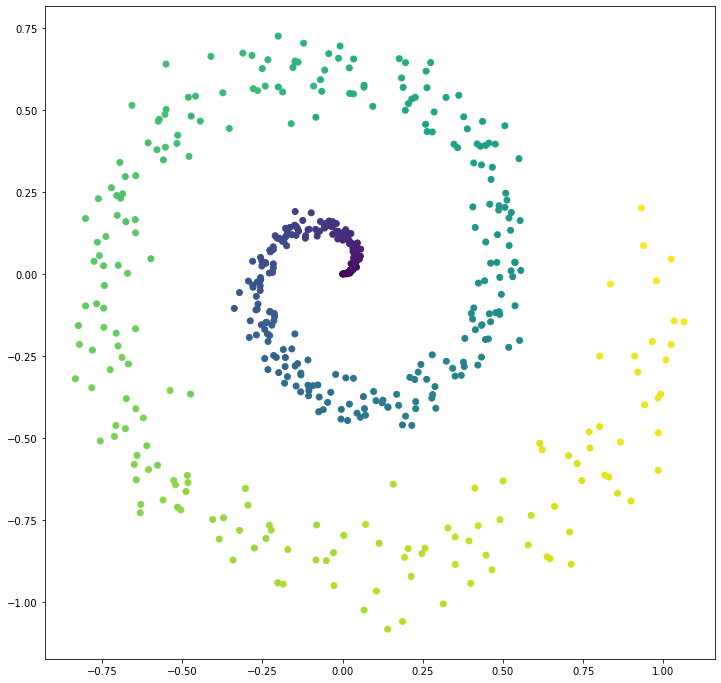

In [2]:
import matplotlib.pyplot as plt
pts = 500

pointcloud = [[(t/pts)*cos(4*pi*t/pts),(t/pts)*sin(4*pi*t/pts)] for t in range(pts)]
pointcloud = [[pointcloud[j][i] + normalvariate(0,0.1*j/pts) for i in range(len(pointcloud[0]))] for j in range(len(pointcloud))]


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
c=[i/pts for i in range(pts)]
ax.scatter([pt[0] for pt in pointcloud], [pt[1] for pt in pointcloud], c=c)
plt.show()

In [3]:
#A few options for weight functions
def dweight(pt1,pt2):
    assert(len(pt1)==len(pt2))
    dist = sqrt(sum([(pt1[i]-pt2[i])**2 for i in range(len(pt1))]))
    if dist==0:
        return 1
    else:
        return 1/dist
def dsquareweight(pt1,pt2):
    assert(len(pt1)==len(pt2))
    dist = sum([(pt1[i]-pt2[i])**2 for i in range(len(pt1))])
    if dist==0:
        return 1
    else:
        return 1/dist
def dexpweight(pt1,pt2,exponent):
    assert(len(pt1)==len(pt2))
    return exp(-sum([(pt1[i]-pt2[i])**2 for i in range(len(pt1))])*exponent)

#We'll use the exponential weights, as suggested by Lafon and Lee.
exponent = 30
W = np.array([[dexpweight(pt1,pt2,exponent) for pt2 in pointcloud] for pt1 in pointcloud])

In [4]:
P = []
for row in W:
    degree = sum(row)
    P.append(row/degree)

In [5]:
eigenvalues, eigenvectors = linalg.eig(P)
eigenvectors = np.transpose(eigenvectors)

In [6]:
eigs = list(zip(eigenvalues,eigenvectors))
eigs.sort(reverse=True, key=(lambda x : abs(x[0])))
eigenvalues, eigenvectors = list(zip(*eigs))
map0=eigenvalues[1]*eigenvectors[1]
map1=eigenvalues[2]*eigenvectors[2]

The method successfully finds the local structure of the dataset and unrolls the spiral.

/home/brantley/.anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


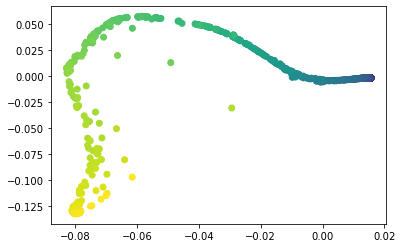

In [7]:
plt.scatter(map0,map1,c=c)

/home/brantley/.anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


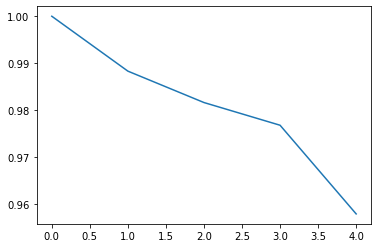

In [8]:
plt.plot(list(eigenvalues[0:5]))

# Example 2

This one is a noisy figure-eight twisted up in 4 dimensions. The below plot is of the first three coordinates.

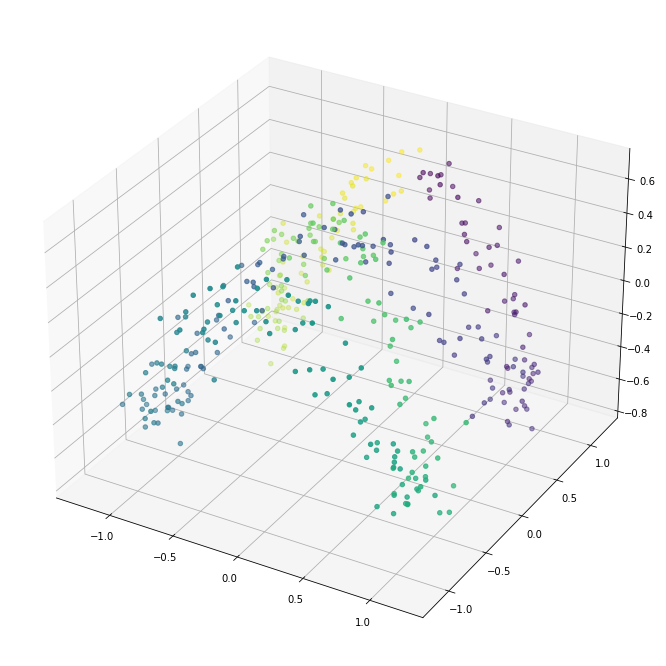

In [9]:
pts = 400

pointcloud = [[sin(4*pi*t/pts),
               cos(2*pi*t/pts),
               0.5*cos(8*pi*t/pts),
               0.5*sin(16*pi*t/pts)
              ] for t in range(pts)]
pointcloud = [[pt[i] + normalvariate(0,0.1) for i in range(len(pt))] for pt in pointcloud]


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
c=[i/pts for i in range(pts)]
ax.scatter([pt[0] for pt in pointcloud], [pt[1] for pt in pointcloud], [pt[2] for pt in pointcloud], c=c)
plt.show()

In [10]:
exponent = 10
W = np.array([[dexpweight(pt1,pt2,exponent) for pt2 in pointcloud] for pt1 in pointcloud])
P = []
for row in W:
    degree = sum(row)
    P.append(row/degree)
eigenvalues, eigenvectors = linalg.eig(P)
eigenvectors = np.transpose(eigenvectors)
eigs = list(zip(eigenvalues,eigenvectors))
eigs.sort(reverse=True, key=(lambda x : abs(x[0])))
eigenvalues, eigenvectors = list(zip(*eigs))
map0=eigenvalues[1]*eigenvectors[1]
map1=eigenvalues[2]*eigenvectors[2]

This method successfully finds the topology of the dataset, giving us a figure-eight. I believe the sharp corners are because my parameterization of the figure-eight is not unit-speed, so the sampled points tend to bunch up in places where the parameterization slows down.

/home/brantley/.anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


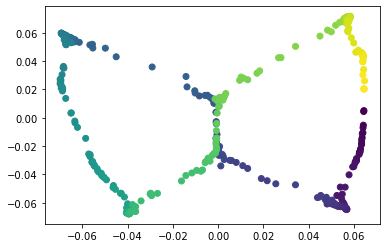

In [11]:
plt.scatter(map0,map1,c=c)